### 1. Import libraries

In [ ]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(r"C:\Users\subhi.gupta\Downloads\Case studies\Sales\data_prep")
from feature_engineering import *

### 2. Load the data

In [2]:
df = pd.read_csv(r"C:\Users\subhi.gupta\Downloads\Case studies\Sales\datasets\sales-data.csv", parse_dates=["timestamp"])
df

,timestamp,product_id,category,price,quantity,region,customer_age,channel
0,2024-01-01 00:00:00,P007,sports,41393.19,4,Mumbai,56,retail
1,2024-01-01 01:00:00,P004,grocery,38249.94,4,Delhi,29,retail
2,2024-01-01 02:00:00,P005,food,28719.09,2,Coimbatore,22,online
3,2024-01-01 03:00:00,P007,sports,47806.75,1,Chennai,19,online
4,2024-01-01 04:00:00,P003,clothing,10103.68,1,Salem,33,retail
...,...,...,...,...,...,...,...,...
4995,2024-07-27 03:00:00,P005,food,4009.08,1,Hyderabad,43,retail
4996,2024-07-27 04:00:00,P006,beauty,3721.48,1,Coimbatore,50,online
4997,2024-07-27 05:00:00,P003,clothing,42530.85,1,Mumbai,53,retail
4998,2024-07-27 06:00:00,P002,electronics,10721.22,4,Coimbatore,21,retail


In [3]:
df_copy = df.copy()

### 3. Create new features
- revenue
- Time features : date, month, year, weekday, is_weekend
- age_group: Categorized customer age into three three categories:
    - younger (students, people early in their career)
    - adults (people with stable income)
    - middle-aged (mature people)

In [4]:
df["revenue"] = df["price"]*df["quantity"]

In [5]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)
df

,timestamp,product_id,category,price,quantity,region,customer_age,channel,revenue,year,month,day,hour,weekday,is_weekend
0,2024-01-01 00:00:00,P007,sports,41393.19,4,Mumbai,56,retail,165572.76,2024,1,1,0,0,0
1,2024-01-01 01:00:00,P004,grocery,38249.94,4,Delhi,29,retail,152999.76,2024,1,1,1,0,0
2,2024-01-01 02:00:00,P005,food,28719.09,2,Coimbatore,22,online,57438.18,2024,1,1,2,0,0
3,2024-01-01 03:00:00,P007,sports,47806.75,1,Chennai,19,online,47806.75,2024,1,1,3,0,0
4,2024-01-01 04:00:00,P003,clothing,10103.68,1,Salem,33,retail,10103.68,2024,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-07-27 03:00:00,P005,food,4009.08,1,Hyderabad,43,retail,4009.08,2024,7,27,3,5,1
4996,2024-07-27 04:00:00,P006,beauty,3721.48,1,Coimbatore,50,online,3721.48,2024,7,27,4,5,1
4997,2024-07-27 05:00:00,P003,clothing,42530.85,1,Mumbai,53,retail,42530.85,2024,7,27,5,5,1
4998,2024-07-27 06:00:00,P002,electronics,10721.22,4,Coimbatore,21,retail,42884.88,2024,7,27,6,5,1


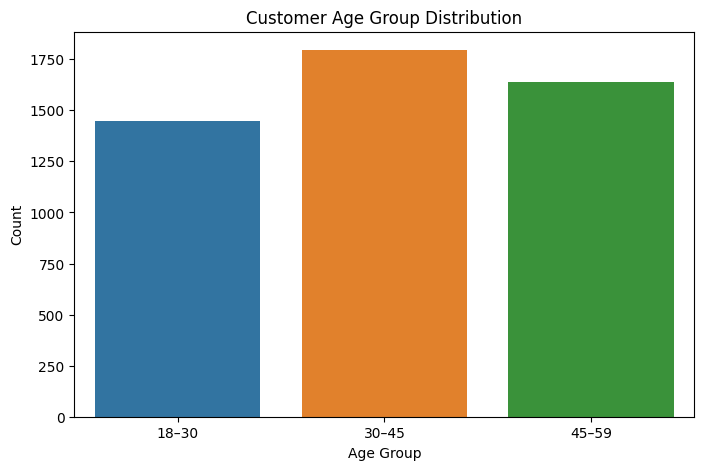

In [6]:
bins = [18, 30, 45, 59]
labels = ["18–30", "30–45", "45–59"]

df["age_group"] = pd.cut(df["customer_age"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="age_group")
plt.title("Customer Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [7]:
def categorize_age(age):
    if age < 30:
        return "younger"
    elif age < 45:
        return "adults"
    else:
        return "middle-aged"

df["age_group"] = df["customer_age"].apply(categorize_age)

In [8]:
df

,timestamp,product_id,category,price,quantity,region,customer_age,channel,revenue,year,month,day,hour,weekday,is_weekend,age_group
0,2024-01-01 00:00:00,P007,sports,41393.19,4,Mumbai,56,retail,165572.76,2024,1,1,0,0,0,middle-aged
1,2024-01-01 01:00:00,P004,grocery,38249.94,4,Delhi,29,retail,152999.76,2024,1,1,1,0,0,younger
2,2024-01-01 02:00:00,P005,food,28719.09,2,Coimbatore,22,online,57438.18,2024,1,1,2,0,0,younger
3,2024-01-01 03:00:00,P007,sports,47806.75,1,Chennai,19,online,47806.75,2024,1,1,3,0,0,younger
4,2024-01-01 04:00:00,P003,clothing,10103.68,1,Salem,33,retail,10103.68,2024,1,1,4,0,0,adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-07-27 03:00:00,P005,food,4009.08,1,Hyderabad,43,retail,4009.08,2024,7,27,3,5,1,adults
4996,2024-07-27 04:00:00,P006,beauty,3721.48,1,Coimbatore,50,online,3721.48,2024,7,27,4,5,1,middle-aged
4997,2024-07-27 05:00:00,P003,clothing,42530.85,1,Mumbai,53,retail,42530.85,2024,7,27,5,5,1,middle-aged
4998,2024-07-27 06:00:00,P002,electronics,10721.22,4,Coimbatore,21,retail,42884.88,2024,7,27,6,5,1,younger


In [9]:
df["year"].unique()

array([2024], dtype=int64)

In [10]:
df["month"].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

## 3. Analysis on revenue.

### 3.1 Analyzing revenue created by different categories

<AxesSubplot: xlabel='category'>

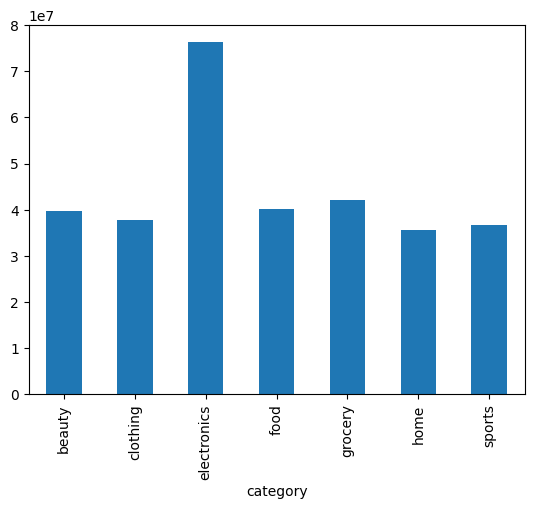

In [11]:
df.groupby("category")["revenue"].sum().plot(kind="bar")

### 3.2 Analyzing revenue created by different products

In [12]:
product_ids = df["product_id"].unique()

for id in product_ids:
    df_filtered = df[df["product_id"]==id]
    print(f"{id}: {df_filtered['category'].unique()}")

P007: ['sports']
P004: ['grocery']
P005: ['food']
P003: ['clothing']
P008: ['home']
P002: ['electronics']
P006: ['beauty']
P001: ['electronics']


<AxesSubplot: xlabel='product_id'>

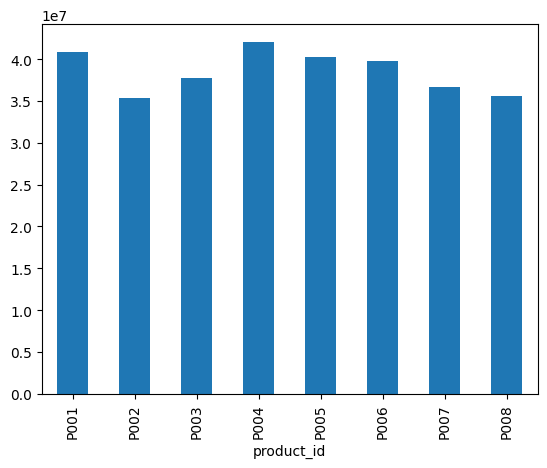

In [13]:
df.groupby("product_id")["revenue"].sum().plot(kind="bar")

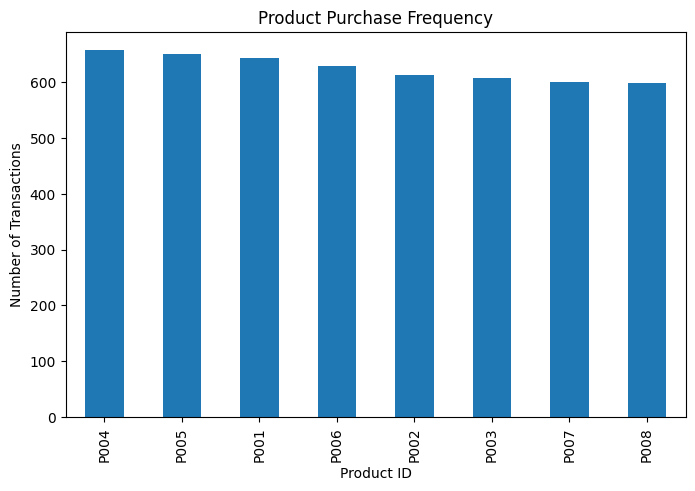

In [14]:
df["product_id"].value_counts().plot(kind="bar", figsize=(8,5))
plt.title("Product Purchase Frequency")
plt.xlabel("Product ID")
plt.ylabel("Number of Transactions")
plt.show()

In [15]:
df.groupby("category")["price"].mean().reset_index()

,category,price
0,beauty,24590.542946
1,clothing,24575.385954
2,electronics,24620.601202
3,food,25374.667450
4,grocery,25005.307382
5,home,24140.013139
6,sports,25108.313527


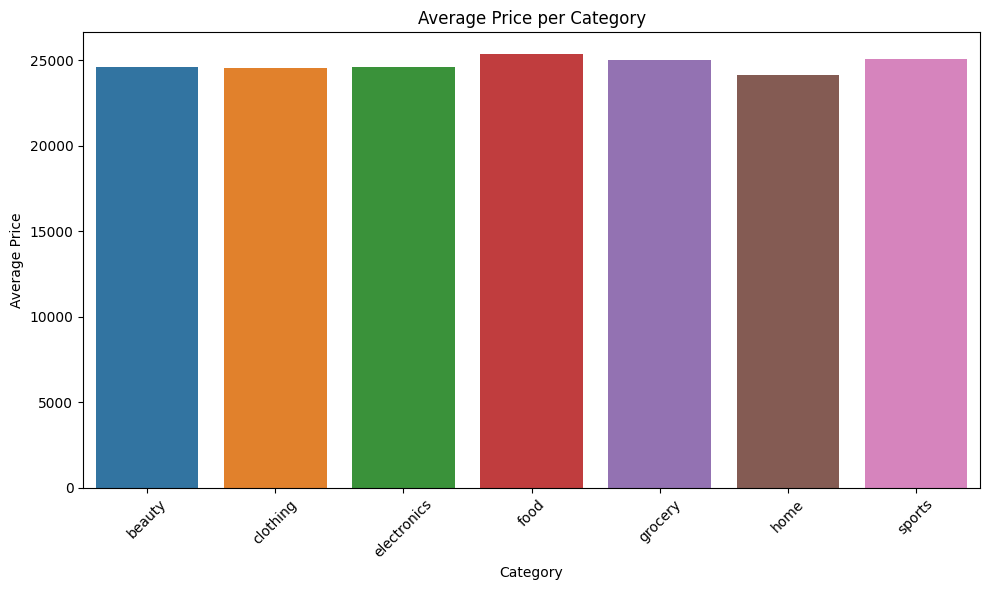

In [16]:
avg_price_per_cat = (df.groupby("category")["price"].mean().reset_index().rename(columns={"price": "avg_price"}))

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_per_cat, x="category", y="avg_price")
plt.xticks(rotation=45)
plt.title("Average Price per Category")
plt.ylabel("Average Price")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

### 3.3 Analyzing revenue created based on regions

<AxesSubplot: xlabel='region'>

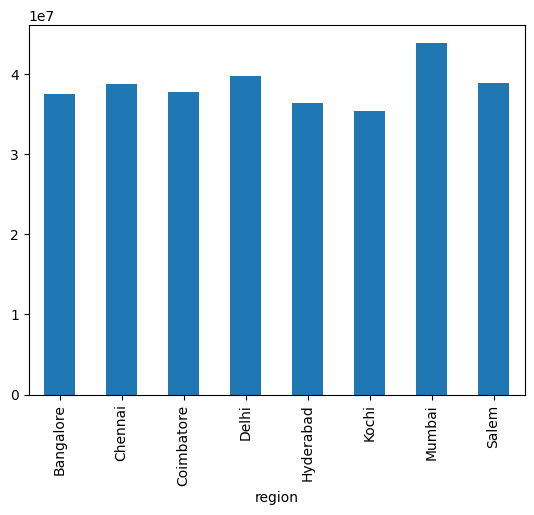

In [17]:
df.groupby("region")["revenue"].sum().plot(kind="bar")

<AxesSubplot: >

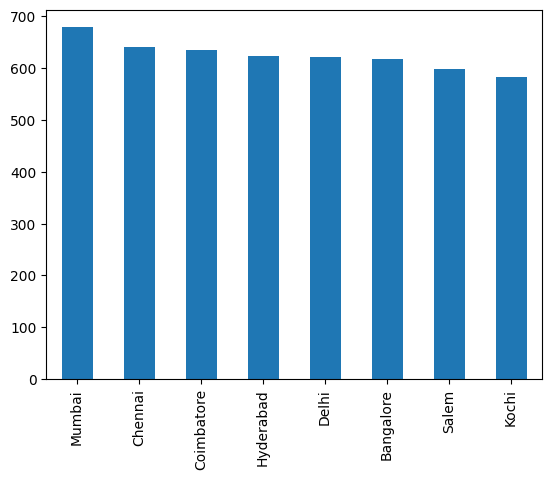

In [18]:
df["region"].value_counts().plot(kind="bar")

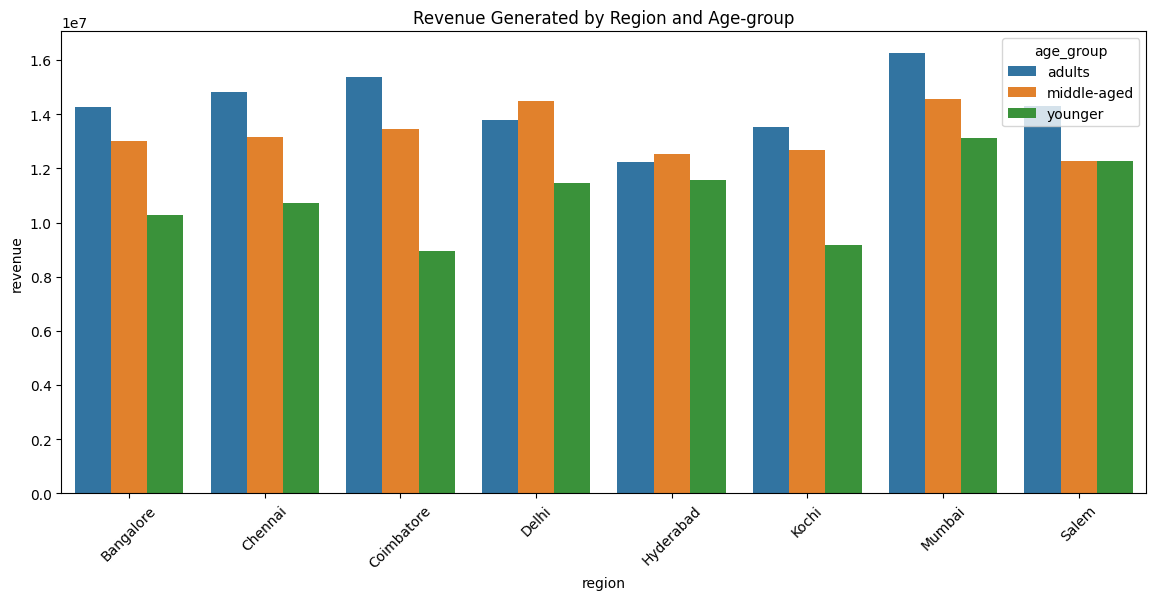

In [19]:
region_cat_units = df.groupby(["region", "age_group"])["revenue"].sum().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=region_cat_units, x="region", y="revenue", hue="age_group")
plt.title("Revenue Generated by Region and Age-group")
plt.xticks(rotation=45)
plt.show()

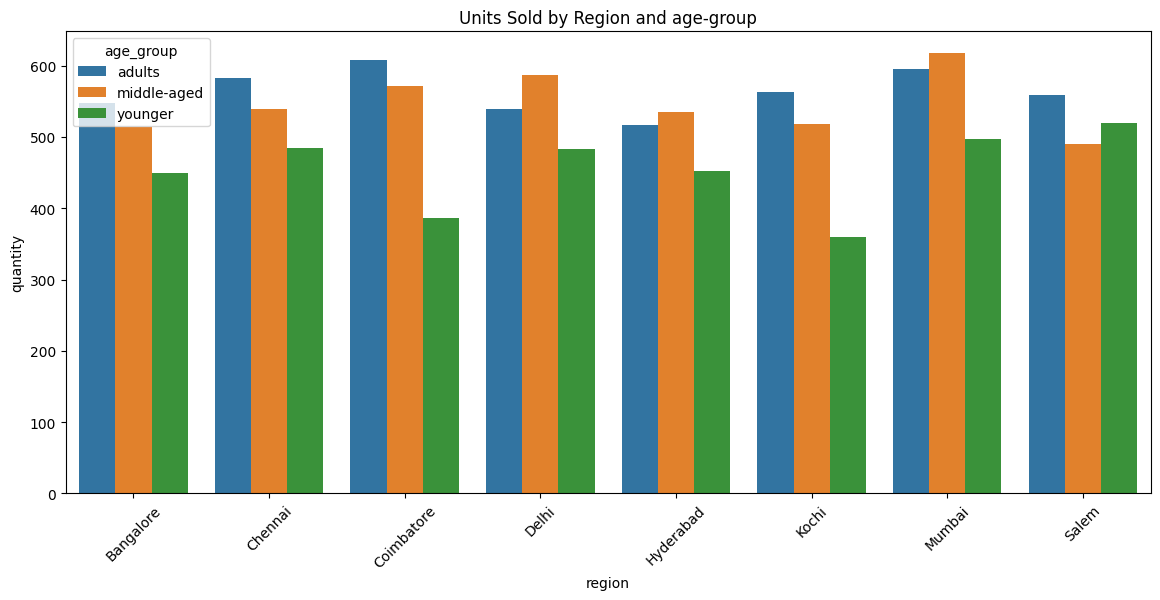

In [20]:
region_cat_units = df.groupby(["region", "age_group"])["quantity"].sum().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=region_cat_units, x="region", y="quantity", hue="age_group")
plt.title("Units Sold by Region and age-group")
plt.xticks(rotation=45)
plt.show()

### 3.4 Analyzing revenue created through various channels

<AxesSubplot: xlabel='channel'>

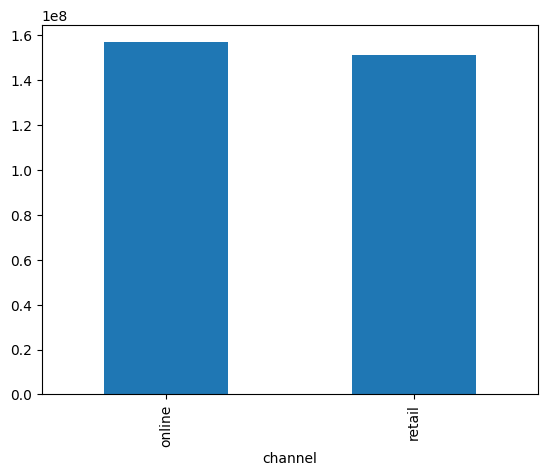

In [21]:
df.groupby("channel")["revenue"].sum().plot(kind="bar")

### 3.5 Analyzing revenue created through various age groups

<AxesSubplot: xlabel='age_group'>

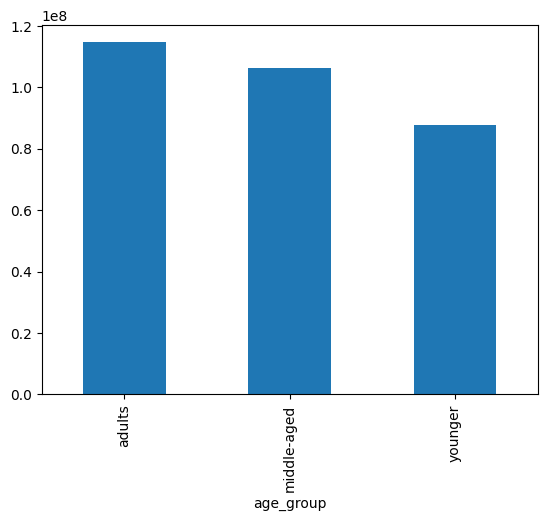

In [22]:
df.groupby("age_group")["revenue"].sum().plot(kind="bar")

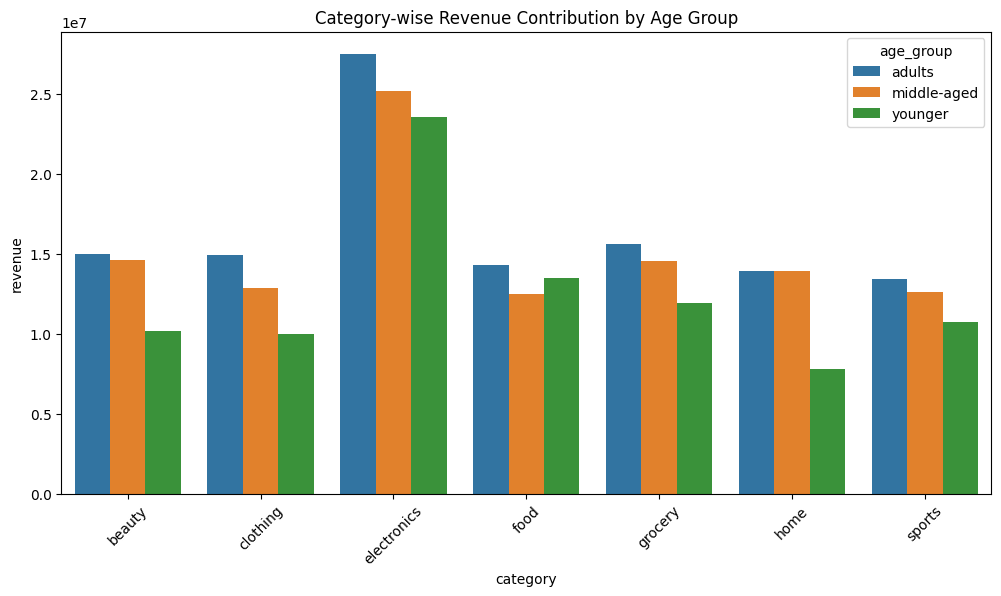

In [23]:
age_cat_revenue = df.groupby(["age_group", "category"])["revenue"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=age_cat_revenue, x="category", y="revenue", hue="age_group")
plt.title("Category-wise Revenue Contribution by Age Group")
plt.xticks(rotation=45)
plt.show()


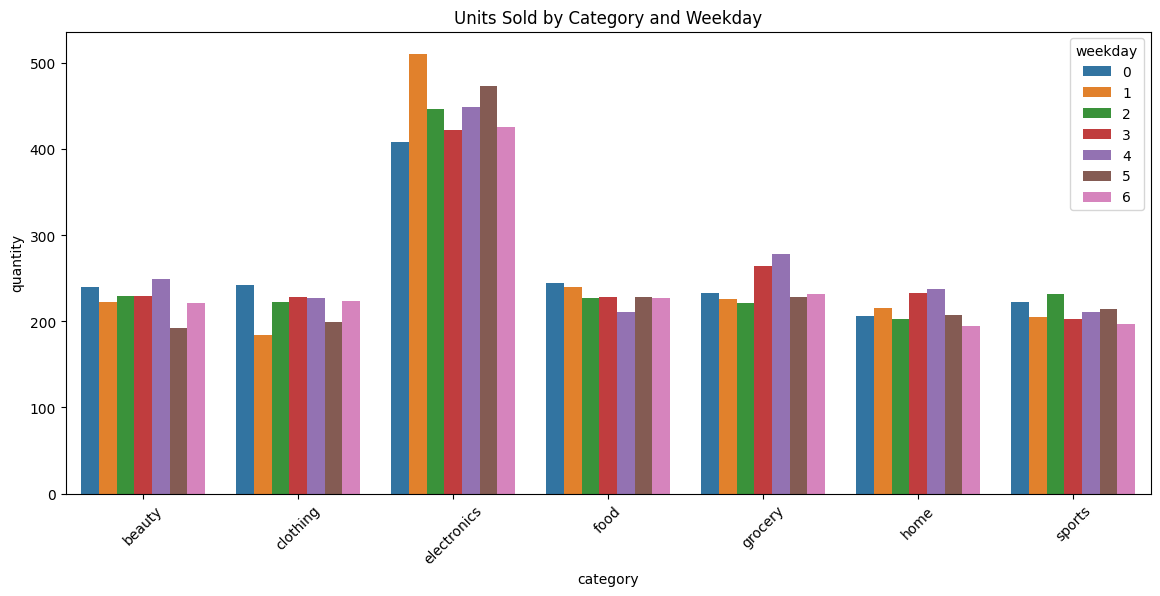

In [24]:
weekday_cat_units = df.groupby(["weekday", "category"])["quantity"].sum().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(data=weekday_cat_units, x="category", y="quantity", hue="weekday")
plt.title("Units Sold by Category and Weekday")
plt.xticks(rotation=45)
plt.show()

### 3.5 Analyzing revenue created based on weekdays

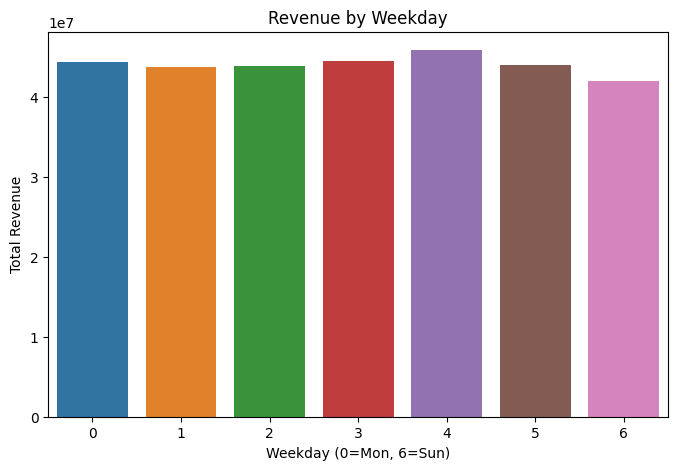

In [25]:
weekday_revenue = df.groupby("weekday")["revenue"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=weekday_revenue, x="weekday", y="revenue")
plt.title("Revenue by Weekday")
plt.xlabel("Weekday (0=Mon, 6=Sun)")
plt.ylabel("Total Revenue")
plt.show()


### Conclusions based on revenue trends
- Using the above historical data for year 2024 collected over a span of 7 months, following insights can be made :
    - Products under the category of electronics bring a lot of revenue to the company, primarily because it has the highest number of transactions among all categories. It can due to various reasons like the company is well known for its electronics items and is a trust-worthy brand because of it's product quality.
    - Categories like clothing, beauty, groceries, and sports have lower transaction counts compared to electronics. The company can plan to increase it's overall revenue in future by endorsing in other kinds of brands for other categories of products too.
    - Mumbai region shows a slightly higher revenue peak than other regions. If the company has less stores in other regions or is facing competition, they should rethink about their market strategies in other regions.
    - Younger customers and adults (roughly 18–40 age group) spend more on clothing, beauty, food, groceries and sports.The company should marketize their products well for attracting people from this age group as they are the high-spending age groups.
    - The company should run targeted marketing campaigns and provide offers in these categories to increase customer engagement and maximize revenue from these high-spending age groups.
    - The company should run customer specific compaigns and offers based on customer's spending behavoiur. They can design recommendation systems to show products online pased on their past history transaction so their engagement increases.
    - Revenue distribution across the week is relatively uniform. Friday–Sunday do not show major spikes compared to weekdays. The company should attract new customers through running targeted weekend offers especially on products like clothing, beauty and food.

In [26]:
new_df = data_prep(df_copy)
new_df

,product_id,year,month,day,hour,weekday,is_weekend,category,region,customer_age,age_group,channel,price,quantity,revenue
0,7,2024,1,1,0,0,0,0,0,56,2,0,41393.19,4,165572.76
1,4,2024,1,1,1,0,0,1,1,29,0,0,38249.94,4,152999.76
2,5,2024,1,1,2,0,0,2,2,22,0,1,28719.09,2,57438.18
3,7,2024,1,1,3,0,0,0,3,19,0,1,47806.75,1,47806.75
4,3,2024,1,1,4,0,0,3,4,33,1,0,10103.68,1,10103.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5,2024,7,27,3,5,1,2,5,43,1,0,4009.08,1,4009.08
4996,6,2024,7,27,4,5,1,6,2,50,2,1,3721.48,1,3721.48
4997,3,2024,7,27,5,5,1,3,0,53,2,0,42530.85,1,42530.85
4998,2,2024,7,27,6,5,1,5,2,21,0,0,10721.22,4,42884.88


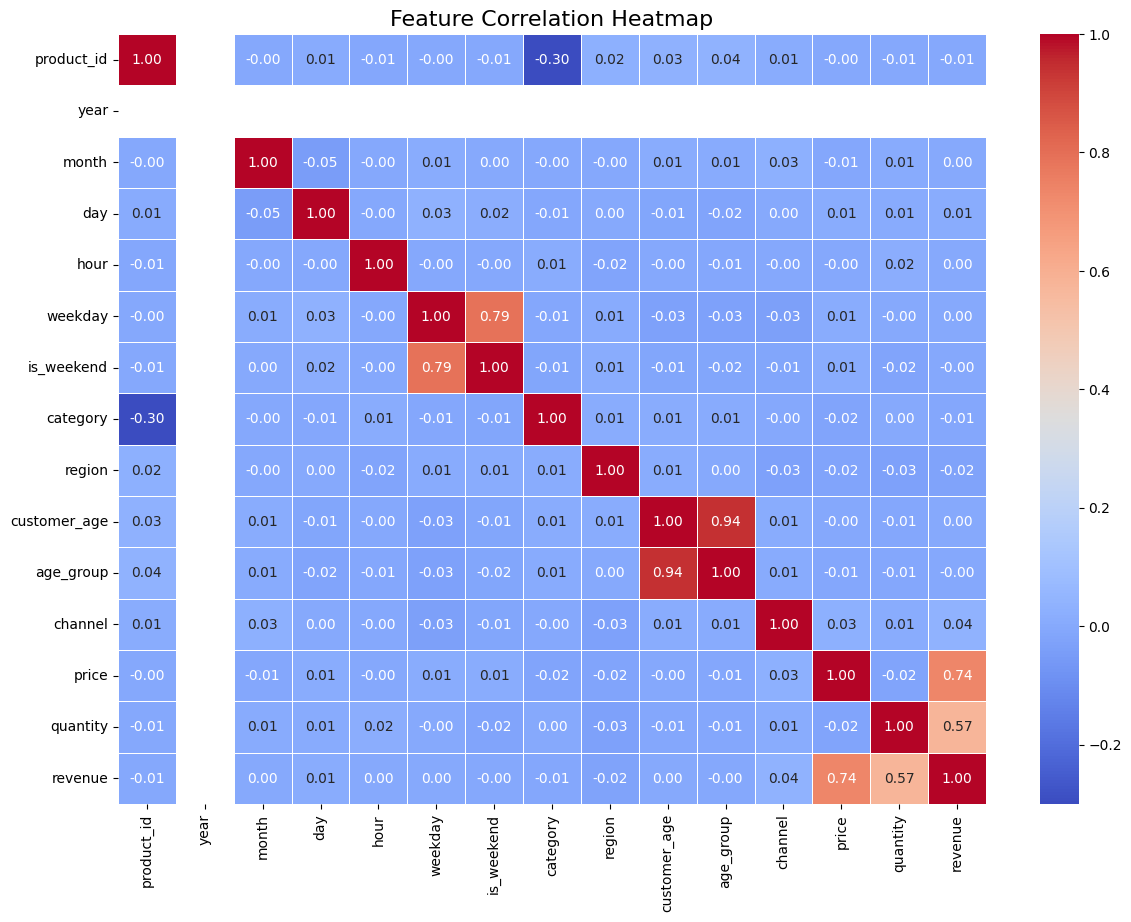

In [27]:
corr_matrix = new_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    annot=True,      # use True if you want numbers shown
    fmt='.2f',
    linewidths=0.5
)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

In [28]:
price_corr = corr_matrix['price'].abs().sort_values(ascending=False)
for feature, corr in price_corr.items():
    if feature != 'price':
        print(f"{feature:20s}: {corr:6.3f}")

revenue             :  0.735
channel             :  0.030
quantity            :  0.019
region              :  0.018
category            :  0.017
day                 :  0.013
is_weekend          :  0.011
weekday             :  0.010
month               :  0.008
age_group           :  0.008
customer_age        :  0.003
hour                :  0.002
product_id          :  0.002
year                :    nan


In [29]:
price_corr = corr_matrix['channel'].abs().sort_values(ascending=False)
for feature, corr in price_corr.items():
    if feature != 'channel':
        print(f"{feature:20s}: {corr:6.3f}")

revenue             :  0.038
weekday             :  0.031
price               :  0.030
month               :  0.028
region              :  0.026
customer_age        :  0.014
product_id          :  0.012
is_weekend          :  0.011
quantity            :  0.011
age_group           :  0.005
category            :  0.004
hour                :  0.002
day                 :  0.001
year                :    nan
